# Assignment 5

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import pystan
import random
import pandas as pd
import itertools

I start by following the instructions to run the model in pySTAN

In [168]:
#Importing data
y = np.array((607, 583, 521, 494, 369, 782, 570, 678, 467, 620, 425, 395, 346, 361, 310, 300, 382, 294, 315, 323, 421, 339, 398, 328, 335, 291, 329, 310, 294, 321, 286, 349, 279, 268, 293, 310, 259, 241, 243, 272, 247, 275, 220, 245, 268, 357, 273, 301, 322, 276, 401, 368, 149, 507, 411, 362, 358, 355, 362, 324, 332, 268, 259, 274, 248, 254, 242, 286, 276, 237, 259, 251, 239, 247, 260, 237, 206, 242, 361, 267, 245, 331, 357, 284, 263, 244, 317, 225, 254, 253, 251, 314, 239, 248, 250, 200, 256, 233, 427, 391, 331, 395, 337, 392, 352, 381, 330, 368, 381, 316, 335, 316, 302, 375, 361, 330, 351, 186, 221, 278, 244, 218, 126, 269, 238, 194, 384, 154, 555, 387, 317, 365, 357, 390, 320, 316, 297, 354, 266, 279, 327, 285, 258, 267, 226, 237, 264, 510, 490, 458, 425, 522, 927, 555, 550, 516, 548, 560, 545, 633, 496, 498, 223, 222, 309, 244, 207, 258, 255, 281, 258, 226, 257, 263, 266, 238, 249, 340, 247, 216, 241, 239, 226, 273, 235, 251, 290, 473, 416, 451, 475, 406, 349, 401, 334, 446, 401, 252, 266, 210, 228, 250, 265, 236, 289, 244, 327, 274, 223, 327, 307, 338, 345, 381, 369, 445, 296, 303, 326, 321, 309, 307, 319, 288, 299, 284, 278, 310, 282, 275, 372, 295, 306, 303, 285, 316, 294, 284, 324, 264, 278, 369, 254, 306, 237, 439, 287, 285, 261, 299, 311, 265, 292, 282, 271, 268, 270, 259, 269, 249, 261, 425, 291, 291, 441, 222, 347, 244, 232, 272, 264, 190, 219, 317, 232, 256, 185, 210, 213, 202, 226, 250, 238, 252, 233, 221, 220, 287, 267, 264, 273, 304, 294, 236, 200, 219, 276, 287, 365, 438, 420, 396, 359, 405, 397, 383, 360, 387, 429, 358, 459, 371, 368, 452, 358, 371))
ind = np.array((1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34))-1
#523->323 to Change back "the dude"

In [169]:
from __future__ import division
from pylab import * # this line will import math and plot functions that I may need

close('all')


## Stan implementation
ass5_code = """
data {
    int<lower=0> NInd; //Number of participants
    int<lower=0> Samples; // number of samples, integer with a lower bound = 0  
    real<lower=0> y[Samples]; // Vector of samples, y with length "Samples" of real values
    int Ind[Samples];
}
parameters {
    real mu;
    real<lower=0> tau;
    real theta[NInd];
    real<lower=0> sigma;
}
transformed parameters {
}
model {
    mu ~ uniform(-10000, 10000); // Flat prior distribution on mu
    tau ~ uniform(0, 10000); // Flat prior distribution on tau
    for (i in 1:NInd)    
        theta[i] ~ normal(mu, tau); // Group level distribution of theta
    sigma ~ uniform(0, 10000); // Flat prior distribution on sigma
    for (s in 1:Samples)
        y[s] ~ lognormal(theta[Ind[s]], sigma); // likelihood, i.e collected data. Note that stan will create the posterior automatically. 
}
"""

ass5_dat = {'Ind': ind+1, #correcting the indexing to start from 1 for the C++ compilation
            'NInd': np.max(ind)+1,
            'Samples': np.size(y),
            'y': y}

model = pystan.StanModel(model_code=ass5_code) #Create a model instance
fit = model.sampling(data=ass5_dat,iter=100000,warmup=1000, chains=1) #Call the sampling using the model instance

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d0b23285737f38ccf5aa217270a2d0bf NOW.


In [170]:
results=fit.extract(permuted=True) # return a dictionary of arrays with the sampled parameter data

In [171]:
#Trying to extract a parameter array from the results
TheDude=results['theta'][:,3] # This corresponds to the array of sampled values for parameter theta and individial number 4 i.e the dude (since indexing from zero).
sigma=results['sigma']

In [172]:
def HDIofMCMC(SampleArray, credMass=.95): #Computes the HDI from an array of a unimodal samples of representative values.
    sortedarray=np.sort(SampleArray)
    CielingIndex=np.ceil(credMass*np.size(sortedarray))
    nCI=np.size(sortedarray)-CielingIndex
    ciWidth=np.zeros(int(nCI))
    for i in range(int(nCI)):
        ciWidth[i]=sortedarray[i+int(CielingIndex)]-sortedarray[i]
    HDImin=(sortedarray[np.argmin(ciWidth)])
    HDImax=(sortedarray[np.argmin(ciWidth)+int(CielingIndex)])
    HDIlim=np.array([HDImin,HDImax])
    return(HDIlim)

# Task A

## 1.
### a.
I start by plotting the sampled theta parameter distribution for "the dude".

In [173]:
ETheDude=exp(TheDude+sigma**2/2)

In [174]:
exp(TheDude)

array([363.18190321, 252.73120439, 270.16981956, ..., 377.51921073,
       346.68694099, 378.39831922])

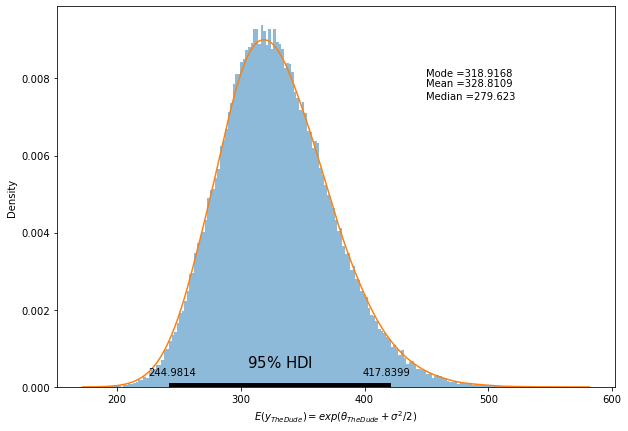

In [175]:
fig= plt.figure(figsize=(10,7))


#Posterior Histograms from MCMC
binsizeTheDude=np.linspace(np.min(ETheDude),np.max(ETheDude),200)
plt.hist(ETheDude,binsizeTheDude,density=True, alpha=.5)

#False smooth density plot
density = scipy.stats.gaussian_kde(ETheDude)
xs = np.linspace(min(ETheDude),max(ETheDude),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs,density(xs))

    
#Posterior HDI values
HDI=HDIofMCMC(ETheDude,.95) #Calculates the 95% HDI of the MCMC data
   
plt.plot(HDI,(0,0),'k',linewidth=8.0)
plt.text(np.mean(HDI), 0.0005, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
plt.text(HDI[0], 0.0003, str(np.round(HDI[0],4)), fontsize=10,ha='center')
plt.text(HDI[1], 0.0003, str(np.round(HDI[1],4)), fontsize=10,ha='center')
plt.text(450,0.008,'Mean ='+str(np.round(np.mean(ETheDude),4)),va='top')
plt.text(450,0.008,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
plt.text(450,0.0074,'Median ='+str(np.round(ETheDude[int(np.size(ETheDude)/2)],4)),va='bottom')




plt.xlabel(r'$E(y_{TheDude})=exp(\theta_{TheDude}+\sigma^2/2)$')
plt.ylabel('Density')

plt.show()

The expected reaction time of the dude is with 95% certainty within the 240-417 ms range judging from the HDI. The mode mean and median of the expected value distribution is also shown in the diagram.

### b.
The reason we can get an estimation for the reaction time of the dude despite having only one measurement is that the infomation about the posterior of the dude is informed by the other parameter likelihood distributions. The overarching category distribution (which is N(mu, tau) in the model) transfers the information from the likelihood to inform the sampling of the posterior of the dude.

## 2.
### a.
The result of a random individual (i.e someone who did not take the test) corresponds to the overarching "group" distribution that is $N(\mu, \tau)$ distributed. The expected reaction time for the group is then $exp(\mu,\tau^2/2+\sigma^2/2$. I plot the results as above using these parameters from the MCMC result.

In [176]:
#Extracting parameter arrays from the results
mu=results['mu']
tau=results['tau']
Anyone=exp(mu+tau**2/2+sigma**2/2)

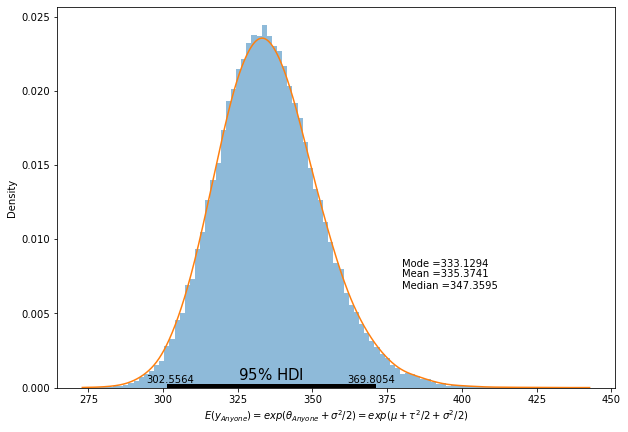

In [177]:
fig= plt.figure(figsize=(10,7))


#Posterior Histograms from MCMC
binsizeAnyone=np.linspace(np.min(Anyone),np.max(Anyone),100)
plt.hist(Anyone,binsizeAnyone,density=True, alpha=.5)

#False smooth density plot, code I found online...
density = scipy.stats.gaussian_kde(Anyone)
xs = np.linspace(min(Anyone),max(Anyone),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs,density(xs))

    
#Posterior HDI values
HDI=HDIofMCMC(Anyone,.95) #Calculates the 95% HDI of the MCMC data
   
plt.plot(HDI,(0,0),'k',linewidth=8.0)
plt.text(np.mean(HDI), 0.0005, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
plt.text(HDI[0], 0.0003, str(np.round(HDI[0],4)), fontsize=10,ha='center')
plt.text(HDI[1], 0.0003, str(np.round(HDI[1],4)), fontsize=10,ha='center')
plt.text(380,0.008,'Mean ='+str(np.round(np.mean(Anyone),4)),va='top')
plt.text(380,0.008,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
plt.text(380,0.0065,'Median ='+str(np.round(Anyone[int(np.size(Anyone)/2)],4)),va='bottom')




plt.xlabel(r'$E(y_{Anyone})=exp(\theta_{Anyone}+\sigma^2/2)=exp(\mu+\tau^2/2+\sigma^2/2)$')
plt.ylabel('Density')

plt.show()

#### i.
The expected reaction time for any individual can be seen in the mean from the plot above. 335.5 ms
#### ii.
We randomly sample 10000 $\mu, \tau$ and $\sigma$ from the 100000 MCMC chain posterior samples. From each set of parameters we sample a new theta and a reaction time y. We then plot the histogram of these values.

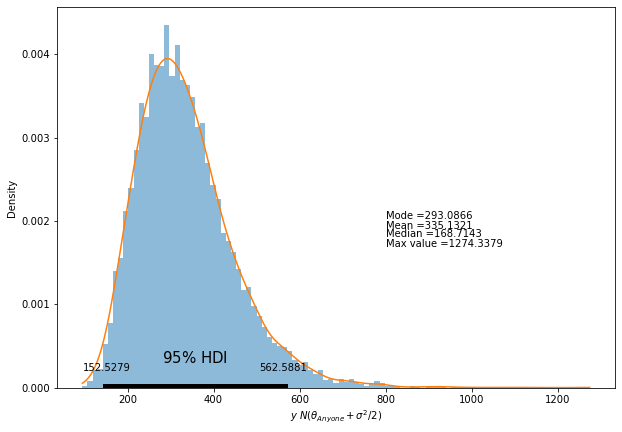

In [178]:
RandArg=np.random.randint(0,np.size(mu),10000) #10000 random integers between 0 and the size of mu.
ThetaRand=np.zeros(np.size(RandArg))
logy=np.zeros(np.size(RandArg))
for i in range(np.size(RandArg)):
    ThetaRand[i]+=np.random.normal(mu[RandArg[i]],tau[RandArg[i]])
    logy[i]+=np.random.normal(ThetaRand[i],sigma[RandArg[i]])
yPredict=exp(logy)

fig= plt.figure(figsize=(10,7))

#Posterior Predictive Distribution
binsizeyPredict=np.linspace(np.min(yPredict),np.max(yPredict),100)
plt.hist(yPredict,binsizeyPredict,density=True, alpha=.5)

#False smooth density plot, code I found online...
density = scipy.stats.gaussian_kde(yPredict)
xs = np.linspace(min(yPredict),max(yPredict),1000)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs,density(xs))

    
#Posterior HDI values
HDI=HDIofMCMC(yPredict,.95) #Calculates the 95% HDI of the MCMC data
   
plt.plot(HDI,(0,0),'k',linewidth=8.0)
plt.text(np.mean(HDI), 0.0003, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
plt.text(HDI[0], 0.0002, str(np.round(HDI[0],4)), fontsize=10,ha='center')
plt.text(HDI[1], 0.0002, str(np.round(HDI[1],4)), fontsize=10,ha='center')
plt.text(800,0.0020,'Mean ='+str(np.round(np.mean(yPredict),4)),va='top')
plt.text(800,0.0020,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
plt.text(800,0.00178,'Median ='+str(np.round(yPredict[int(np.size(yPredict)/2)],4)),va='bottom')
plt.text(800,0.00178,'Max value ='+str(np.round(np.max(yPredict),4)),va='top')



plt.xlabel(r'$y ~ N(\theta_{Anyone}+\sigma^2/2)$')
plt.ylabel('Density')

plt.show()

#### a.
We now want to compare this calculated posterior predictive histogram with the statistics of the reaction times as provided by the website

![Benchmark](Benchmark.PNG)


The tail is notably heavier in the data provided by the website. It almost looks like it is bimodal. This could be because of a larger collection of different data in their sampling. Our sample consist mostly of 25+ academics with relatively good reaction times. We might need to sample more children to approach a pronounced bimodal shape. The slowest reaction time sampled is 1127.8 ms. This would likely be similar for the data provided by the website except that they have choosen to cut-of the data they present at a rather reasonably slowest max value (450 ms). Realistically most humans would react faster than this.  

### 3.
I attempt to plot this figure. Using boxplots seemed like the easiest option.

In [179]:
np.arange(1,len(meanSample)+1,1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

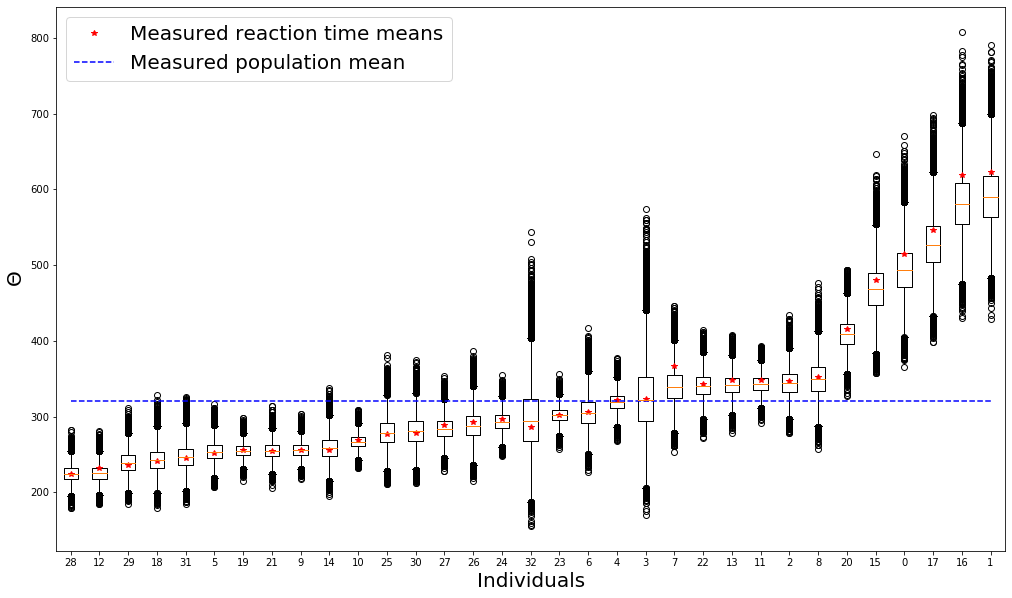

In [180]:
fig= plt.figure(figsize=(17,10))


#False smooth density plot, code I found online...
Theta=np.zeros((np.max(ind),np.size(mu)))
meanTheta=zeros(33)
Indindex=np.arange(0,33,1)
for i in range(np.max(ind)):
    Theta[(i)]=exp(results['theta'][:,i])
    meanTheta[i]=np.mean(Theta[i])



#Extract the mean of each individual
ind=list(ind)
ypos=0
meanSample=[0]*33
for i in range(max(ind)):
    nElem=0
    for j in range(ind.count(i)):
        meanSample[i]+=y[ypos]
        nElem+=1
        ypos+=1
    meanSample[i]=meanSample[i]/nElem

#Sort the two lists together accoding to mean and extract data for the boxplot 
zippedlists=list(zip(meanTheta,Indindex,Theta,meanSample))
ThetaSorted=[x for _, _, x, _ in sorted(zippedlists)]
Indindex=[x for _, x, _, _ in sorted(zippedlists)]
meanSample=[x for _, _, _, x in sorted(zippedlists)]
plt.boxplot((ThetaSorted), labels=Indindex)
plt.plot(np.arange(1,len(meanSample)+1,1),meanSample,'*r', label='Measured reaction time means')
plt.plot((1,33),(np.mean(y),np.mean(y)),'--b',label='Measured population mean')
plt.legend(fontsize=20)
plt.xlabel('Individuals',fontsize=20)
plt.ylabel(r'$\Theta$',fontsize=20)

#plt.hist(yPredict,binsizeyPredict,density=True, alpha=.5)
#plt.stackplot(xs,ys)

    
#Posterior HDI values
HDI=HDIofMCMC(yPredict,.95) #Calculates the 95% HDI of the MCMC data
   
#plt.plot(HDI,(0,0),'k',linewidth=8.0)
#plt.text(np.mean(HDI), 0.0003, r'$95\%$ HDI', fontsize=15,ha='center') #Plots text in the figure
#plt.text(HDI[0], 0.0002, str(np.round(HDI[0],4)), fontsize=10,ha='center')
#plt.text(HDI[1], 0.0002, str(np.round(HDI[1],4)), fontsize=10,ha='center')
#plt.text(800,0.0020,'Mean ='+str(np.round(np.mean(yPredict),4)),va='top')
#plt.text(800,0.0020,'Mode ='+str(np.round(xs[np.argmax(density(xs))],4)),va='bottom')
#plt.text(800,0.00178,'Median ='+str(np.round(yPredict[int(np.size(yPredict)/2)],4)),va='bottom')
#plt.text(800,0.00178,'Max value ='+str(np.round(np.max(yPredict),4)),va='top')



#plt.xlabel(r'$y ~ N(\theta_{Anyone}+\sigma^2/2)$')
#plt.ylabel('Density')

plt.show()

#### a
Since the join posterior that we sample from using the MCMC chain is informed be the measured data of all individuals the $\theta_i$ values are pulled towards the population mean. This is called shrinkage. The shrinkage is larger for individuals with fewer measurements. To test this I increased the input reaction time of "the dude" to 523 ms. It is very clear from the resulting box plot that the mean of the sampled thetas has shrunk towards the population mean with the actual measurement falling outside in the fourth quartile of the sampled data. It is also visible that the sample means further from the polulation means have more shrinkage and that samples with more measurements (tighter distributions) have less shrinkage.